In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

alldf = {
    "inputdriver": {
        "0.016": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_inputdriver/processed/processed_averaged/latency"+str(0.016)+".csv"),
        "0.025": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_inputdriver/processed/processed_averaged/latency"+str(0.025)+".csv"),
        "0.05": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_inputdriver/processed/processed_averaged/latency"+str(0.05)+".csv"),
        "0.1": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_inputdriver/processed/processed_averaged/latency"+str(0.1)+".csv"),
        "0.2": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_inputdriver/processed/processed_averaged/latency"+str(0.2)+".csv"),

    },
    "netflow2bidi": {
        "0.016": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflow2bidi/processed/processed_averaged/latency"+str(0.016)+".csv"),
        "0.025": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflow2bidi/processed/processed_averaged/latency"+str(0.025)+".csv"),
        "0.05": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflow2bidi/processed/processed_averaged/latency"+str(0.05)+".csv"),
        "0.1": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflow2bidi/processed/processed_averaged/latency"+str(0.1)+".csv"),
        "0.2": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflow2bidi/processed/processed_averaged/latency"+str(0.2)+".csv"),

    },
    "netflowagg": {
        "0.016": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflowagg/processed/processed_averaged/latency"+str(0.016)+".csv"),
        "0.025": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflowagg/processed/processed_averaged/latency"+str(0.025)+".csv"),
        "0.05": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflowagg/processed/processed_averaged/latency"+str(0.05)+".csv"),
        "0.1": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflowagg/processed/processed_averaged/latency"+str(0.1)+".csv"),
        "0.2": pd.read_csv("../controlled_DATA/multiple-rates-driversapps/results_netflowagg/processed/processed_averaged/latency"+str(0.2)+".csv"),

    }
}

print("All datasets loaded")

All datasets loaded


##### DURATION OF EACH PROCESSED EVENT

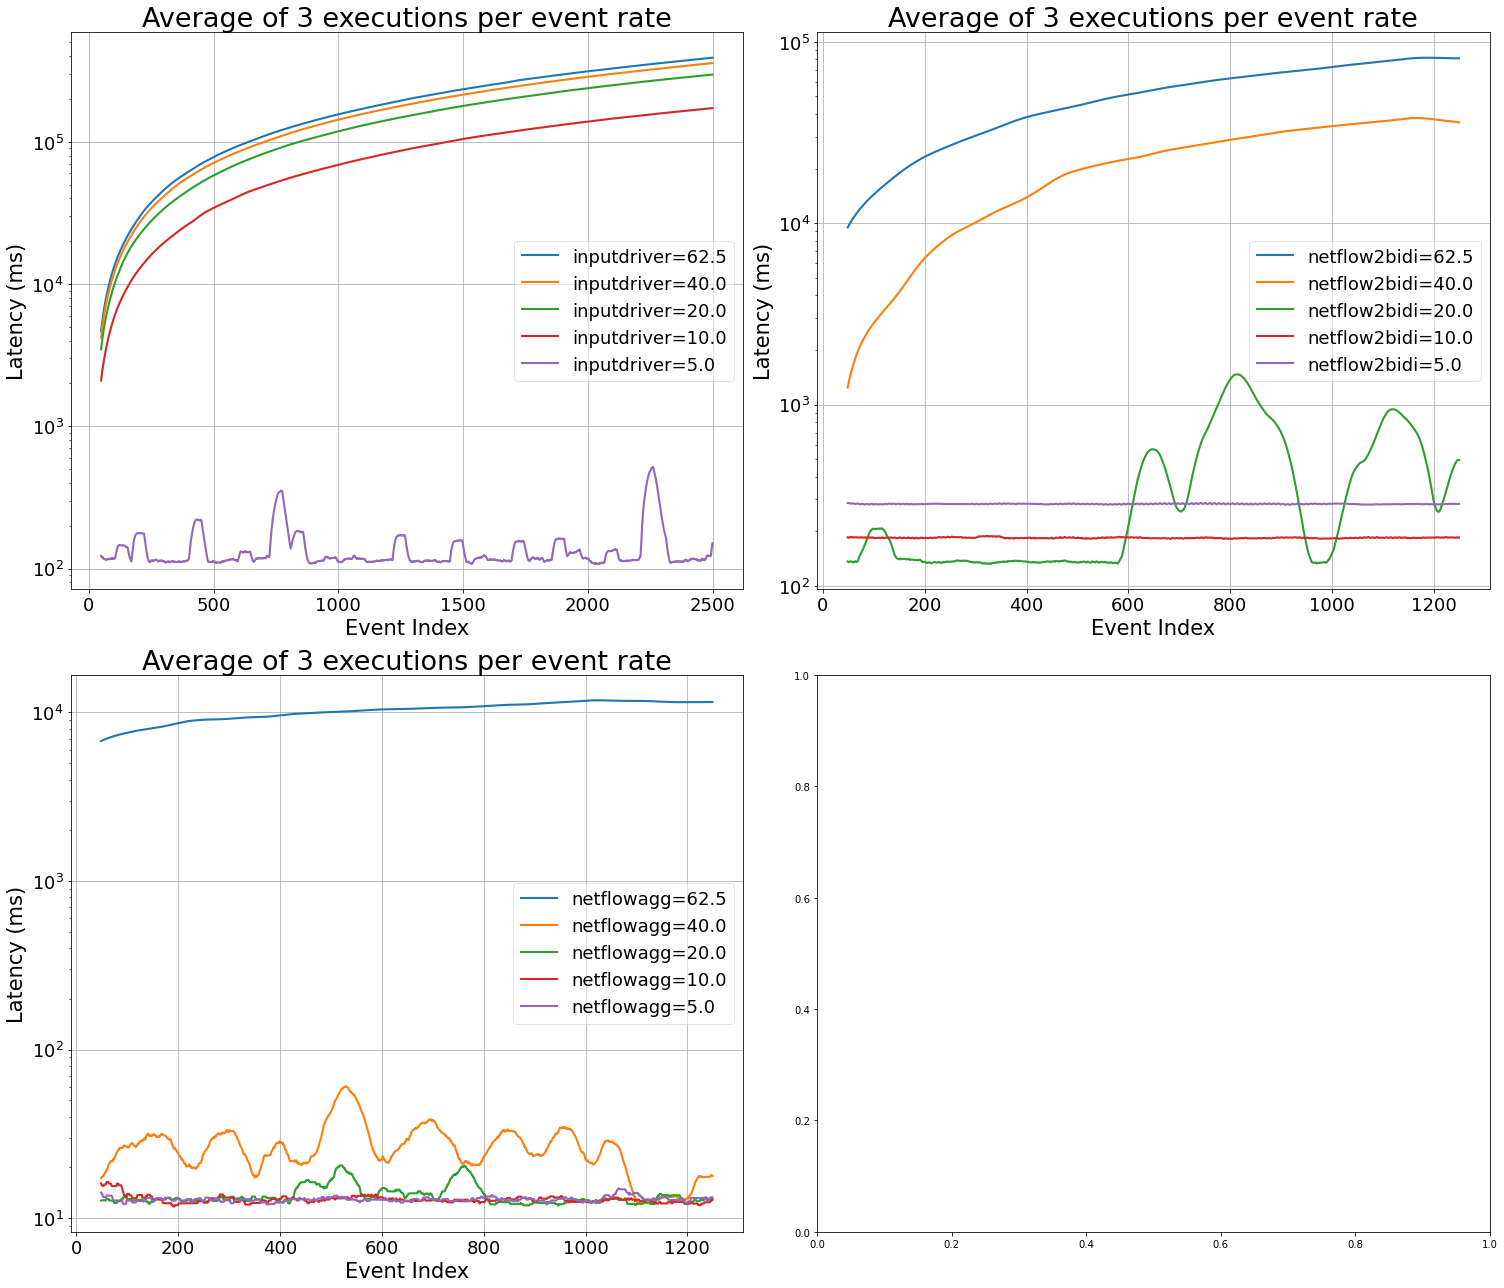

In [4]:
# fig, ax = plt.subplots(figsize=(12, 7), dpi=600)
fig, ax = plt.subplots(2, 2, figsize=(21, 18))

# Rolling window
window_size_all = 50
cont = 0
for driver, values in alldf.items():
    pos = [int(x) for x in bin(cont)[2:].zfill(2)]
    for evrate, df in values.items():
        df["processing_time_ms_window"] = df["processing_time_ms"].rolling(window_size_all).mean()
        ax[pos[0], pos[1]].plot(df.index.to_list(), df["processing_time_ms_window"].to_list(), label=driver+"="+str(1/float(evrate)), linewidth=2.1)

    ax[pos[0], pos[1]].set(yscale='log')

    # CONFIGURATION AX
    ax[pos[0], pos[1]].set_title("Average of 3 executions per event rate", size=27)
    ax[pos[0], pos[1]].set_xlabel("Event Index", size=21)
    ax[pos[0], pos[1]].set_ylabel("Latency (ms)",fontsize=21)
    ax[pos[0], pos[1]].tick_params(axis='both', which='major', labelsize=18)
    ax[pos[0], pos[1]].tick_params(axis='both', which='minor', labelsize=18)
    ax[pos[0], pos[1]].legend(loc='right', framealpha=0.54, fontsize=18)
    ax[pos[0], pos[1]].grid()
    cont += 1


plt.tight_layout()
# plt.savefig("nodriver_results/all_latency_nodriver_execution3_.pdf", format='pdf')
plt.show()

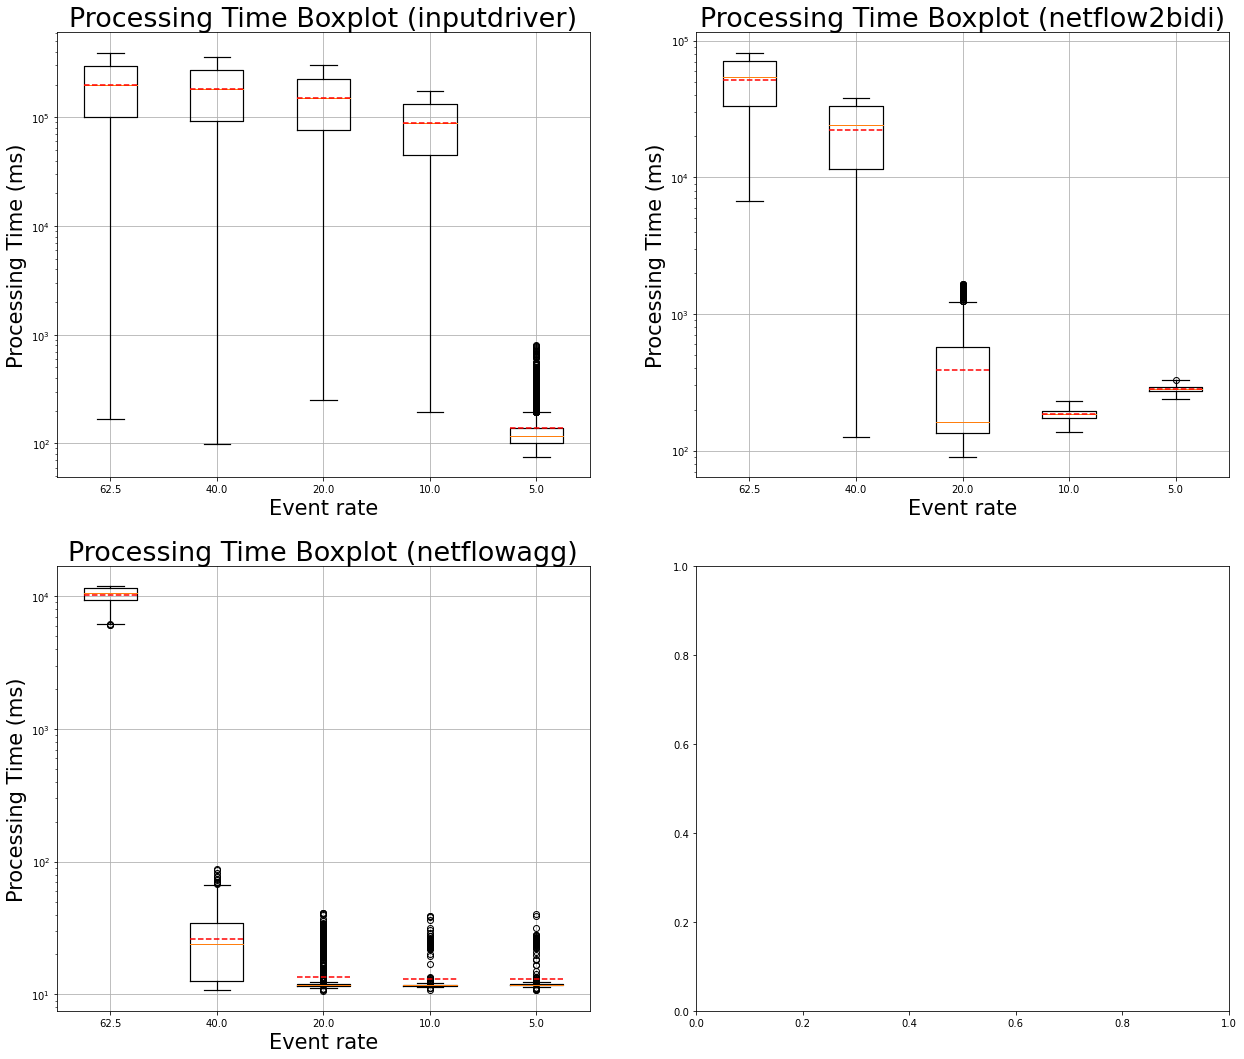

In [21]:
# fig, ax = plt.subplots(figsize=(12, 7), dpi=600)
fig, ax = plt.subplots(2, 2, figsize=(21, 18))

boxplotdict = {}
for driver, driverresults in alldf.items():
    boxplotdict[driver] = {}
    for evrate, df in driverresults.items():
        boxplotdict[driver][str(1/float(evrate))] = df["processing_time_ms"].to_list()


cont = 0
for driver, driverresults in boxplotdict.items():
    pos = [int(x) for x in bin(cont)[2:].zfill(2)]
    bp = ax[pos[0], pos[1]].boxplot(driverresults.values(), meanline=True, showmeans=True)
    ax[pos[0], pos[1]].set(yscale='log')
    ax[pos[0], pos[1]].set_xticklabels(list(driverresults.keys()))
    for element in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(bp[element], color="black", linewidth=1.2)
    plt.setp(bp["means"], color="red", linewidth=1.5)

    ax[pos[0], pos[1]].set_title("Processing Time Boxplot ("+driver+")", size=27)
    ax[pos[0], pos[1]].set_xlabel("Event rate", size=21)
    ax[pos[0], pos[1]].set_ylabel("Processing Time (ms)",fontsize=21)

    ax[pos[0], pos[1]].grid()

    # Next subplot
    cont += 1

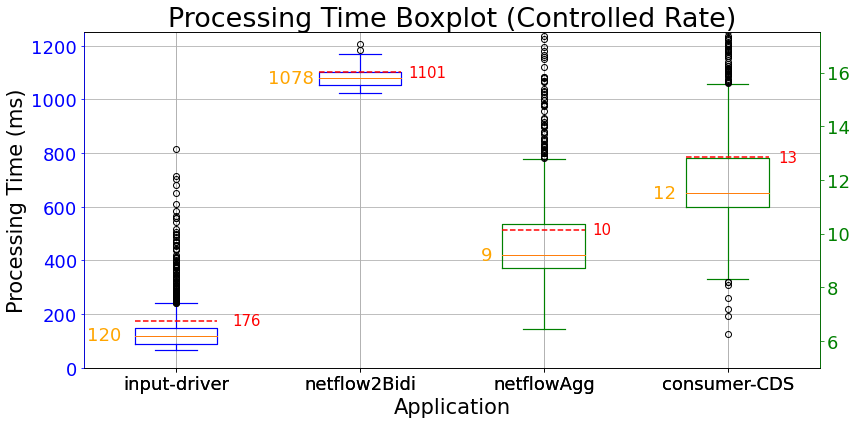

In [8]:
# BOXPLOT of the latency with with 1 event per second ratio
boxplot_dict1 = {}
boxplot_dict1["input-driver"] = df_input["duration_ms"].to_list()
boxplot_dict1["netflow2Bidi"] = df_2Bidi["duration_ms"].to_list()
boxplot_dict1["netflowAgg"] = df_agg["duration_ms"].to_list()
boxplot_dict1["consumer-CDS"] = df_cds["duration_ms"].to_list()

boxplot_dict2 = boxplot_dict1.copy()

boxplot_dict1["netflowAgg"] = boxplot_dict1["netflowAgg"]*0
boxplot_dict1["consumer-CDS"] = boxplot_dict1["consumer-CDS"]*0

# fig, ax = plt.subplots(figsize=(12,7), dpi=600)
fig, ax = plt.subplots(figsize=(12,6))

ax2=ax.twinx()

bp = ax.boxplot(boxplot_dict1.values(), meanline=True, showmeans=True)
for element in ['boxes', 'whiskers', 'fliers', 'caps']:
    plt.setp(bp[element], color="blue", linewidth=1.2) 
plt.setp(bp["means"], color="red", linewidth=1.5)     
ax.set_ylim(0, 1250)

bp2 = ax2.boxplot(boxplot_dict2.values(), meanline=True, showmeans=True)
ax.set_xticklabels(list(boxplot_dict1.keys())*2)
for element in ['boxes', 'whiskers', 'fliers', 'caps']:
    plt.setp(bp2[element], color="green", linewidth=1.2)
plt.setp(bp2["means"], color="red", linewidth=1.5)
ax2.set_ylim(5, 17.5)

ax.set_title("Processing Time Boxplot (Controlled Rate)", size=27)
ax.set_xlabel("Application", size=21)
ax.set_ylabel("Processing Time (ms)",fontsize=21)

ax2.spines['left'].set_color('blue')
ax.tick_params(axis="y", colors='blue', which='both')

ax2.spines['right'].set_color('green')
ax2.tick_params(axis="y", colors='green', which='both')

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)



ax.grid()
plt.tight_layout()
plt.savefig("fairLatency_boxplot_reduced-less.pdf", format='pdf')
plt.show()